# Heart Failure Prediction - Logistic Regression

In [2]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# read data
df = pd.read_csv(r'C:\Users\reetu\Downloads\archive (2)\heart.csv')

# Data Exploration

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [10]:
#object refers to text values (string data type) only
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [12]:

# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [13]:
df.duplicated().value_counts()

False    918
dtype: int64

In [14]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing (df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


# Data Cleaning

In [15]:
#check for null values. If null values found, either remove those data or replace it with average value. 
#If 8 out of 500 rows are null then remove it. if 100 out of 500 are null then have average value.
#Cleaning also includes getting rid of noise (unwanted data for predictive analysis). In this case may be 'Id' or Name if it was there
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Encoding

In [67]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [68]:
X = pd.get_dummies(inputdata, drop_first=False)

In [69]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Visualization

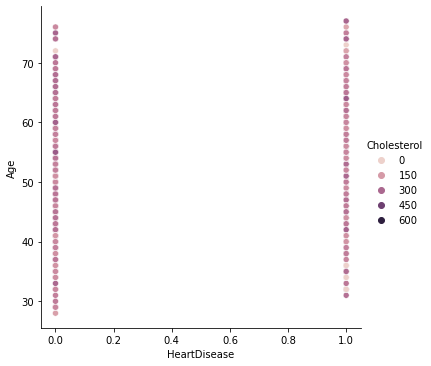

In [17]:
sns.relplot(x='HeartDisease', y='Age', hue='Cholesterol', data=df)

# Modelling

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

# Feature Scaling

In [73]:
scaler = StandardScaler()

In [74]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [75]:

for col in X_train:
    print(col)

Age
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak
Sex_F
Sex_M
ChestPainType_ASY
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
RestingECG_LVH
RestingECG_Normal
RestingECG_ST
ExerciseAngina_N
ExerciseAngina_Y
ST_Slope_Down
ST_Slope_Flat
ST_Slope_Up


In [76]:
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :6].values)

In [77]:
print (X_train_scaled)

[[-0.47492345 -0.0774286  -0.49475326 -0.54494926 -0.40244509  0.59708329]
 [-0.36745046  0.99583741  0.41168862 -0.54494926 -0.36273866  1.62728171]
 [ 0.38486042  0.99583741 -0.63834801  1.83503323  1.42405073 -0.62042395]
 ...
 [ 1.02969832  0.43096056 -0.09089302 -0.54494926  0.27256424  2.93844335]
 [-1.54965328 -0.69879313  0.02577772 -0.54494926  0.90786713  0.12881127]
 [-1.33470731 -1.26366998  0.47451132 -0.54494926  0.19315138 -0.80773275]]


In [79]:
X_test_scaled = scaler.transform(X_test.iloc[:, :6].values)

In [80]:
def model_basic(X_train, y_train, class_weight, solver='liblinear'):
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    return log
model_basic(X_train, y_train, None)

1) Logistic Regression Training Accuracy: 0.867601246105919


C:\Users\reetu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=101)

In [81]:
LR_model = LogisticRegression()
LR_model.fit(X_train_scaled, y_train)
y_prediction = LR_model.predict(X_test_scaled)
y_pred_probability = LR_model.predict_proba(X_test_scaled)
y_pred_probability

array([[0.06825935, 0.93174065],
       [0.18930123, 0.81069877],
       [0.04579551, 0.95420449],
       [0.27563296, 0.72436704],
       [0.17455844, 0.82544156],
       [0.52255547, 0.47744453],
       [0.37399165, 0.62600835],
       [0.39769054, 0.60230946],
       [0.7691537 , 0.2308463 ],
       [0.61553372, 0.38446628],
       [0.87647176, 0.12352824],
       [0.81959253, 0.18040747],
       [0.5249327 , 0.4750673 ],
       [0.11615209, 0.88384791],
       [0.10624104, 0.89375896],
       [0.85777568, 0.14222432],
       [0.05466944, 0.94533056],
       [0.56516999, 0.43483001],
       [0.16227696, 0.83772304],
       [0.18654572, 0.81345428],
       [0.41553684, 0.58446316],
       [0.88617462, 0.11382538],
       [0.08066076, 0.91933924],
       [0.86565343, 0.13434657],
       [0.57967335, 0.42032665],
       [0.13939086, 0.86060914],
       [0.75512853, 0.24487147],
       [0.29075805, 0.70924195],
       [0.32457923, 0.67542077],
       [0.90166031, 0.09833969],
       [0.

In [83]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["prediction"] = y_prediction
test_data["pred_probability"] = y_pred_probability[:, 1]
test_data.sample(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease,prediction,pred_probability
613,58,140,385,1,135,0.3,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0.525717
754,57,132,207,0,168,0.0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0.161788
876,60,130,206,0,132,2.4,0,1,1,0,...,0,0,0,1,0,1,0,1,1,0.831371
61,43,150,254,0,175,0.0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0.100859
375,73,160,0,0,121,0.0,1,0,0,0,...,0,1,1,0,0,0,1,1,1,0.720340
880,52,172,199,1,162,0.5,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0.572992
0,40,140,289,0,172,0.0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0.087232
910,41,120,157,0,182,0.0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0.098340
291,47,140,257,0,135,1.0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0.465917
368,57,140,0,0,120,2.0,0,1,1,0,...,1,0,0,1,0,1,0,1,1,0.914530
